In [2]:
from AD_vibration.data_loader import DataLoader, Sensor
from datetime import datetime, timedelta

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import  decimate , welch
import pandas as pd

In [4]:
def compute_PSD(signals,fs=250,q=2,nperseg=250*30,noverlap=250*20):
    signals = decimate(signals, q, axis=1)
    signals = signals - np.mean(signals, axis=1, keepdims=True)
    f,Sxxs= welch(signals,fs=int(fs/q),nperseg=nperseg,noverlap=noverlap)
    return f,Sxxs

In [46]:
sensor = Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
data_loader = DataLoader(sensor=sensor)
start = datetime(2022, 3, 29,18,10,0)
end = datetime(2022, 6, 26)
PSDs=[]
dts=[]
dt = start
while dt<end:
    try :
        data = data_loader.get_data(start=dt,end=dt+timedelta(minutes=20))
        if data is not None:
            f,Sxxs = compute_PSD(np.array(list(data.values())))
            PSDs.append(Sxxs)
            dts.append(dt)
    except:
        dt += timedelta(minutes=15)
        continue

    dt += timedelta(minutes=15)
    



No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_013900.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_014000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_015500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_021000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_022500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_024000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_025500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_031000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_032500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_034000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/04/17/20220417_035500.tdms
No data at

/home/yacine/Documents/PhD/LocalProject/AD_Vibration/AD_vibration/data_loader/utils.py:37: UserWarning: FAILED IMPORT: No TDMS group found in file: /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/13/20220613_032400.tdms
  warnings.warn('FAILED IMPORT: No TDMS group found in file: '+path, UserWarning)


No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_214300.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_214300.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_215500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_221000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_222500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_224000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_225500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_231000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_232500.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_234000.tdms
No data at /media/yacine/Intenso/RawData/MO04/TDD/TDD_ACC/2022/06/25/20220625_235500.tdms


In [47]:
np.save('PSDs.npy',np.stack(PSDs))
pd.DataFrame(np.array(dts)).to_csv('datetimes.csv')

In [5]:
sensor = Sensor(name='ACC', location='MO04', data_type='TDD', format='.tdms')
data_loader = DataLoader(sensor=sensor)
start = datetime(2022, 3, 29,18,10,0)
dt = start
data = data_loader.get_data(start=dt,end=dt+timedelta(minutes=20))


In [6]:
from kymatio.numpy import Scattering1D

In [7]:
data['ACC2_Y'].shape

(300000,)

In [23]:
T= 300000
J = 16 # 2**10 = 1024 points ==> 1024/250 = 4.096s ==>1 / 4.096 = 0.24Hz 
Q = 24
scattering = Scattering1D(J, T, Q)

In [24]:
Sx = scattering(np.array(list(data.values())))

In [25]:
meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

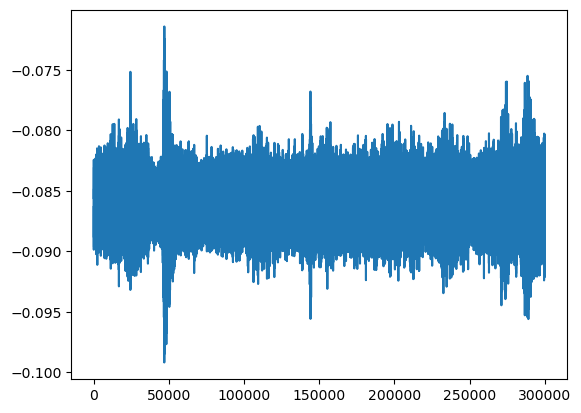

In [19]:
plt.plot(list(data.values())[7])

Text(0.5, 1.0, 'Zeroth-order scattering')

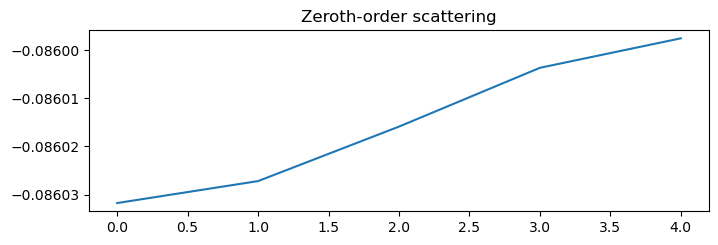

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(3, 1, 1)
plt.plot(Sx[7][order0][0])
plt.title('Zeroth-order scattering')

Text(0.5, 1.0, 'First-order scattering')

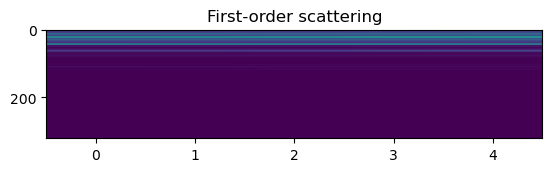

In [26]:
plt.subplot(3, 1, 2)
plt.imshow(Sx[7][order1], aspect='auto')
plt.title('First-order scattering')

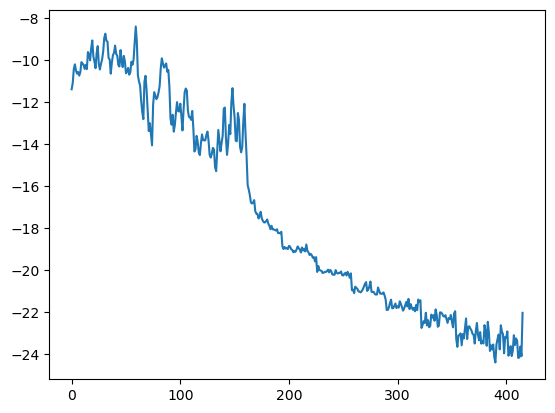

In [22]:
plt.plot(np.log(Sx[7][order1]).mean(axis=1))

Text(0.5, 1.0, 'First-order scattering')

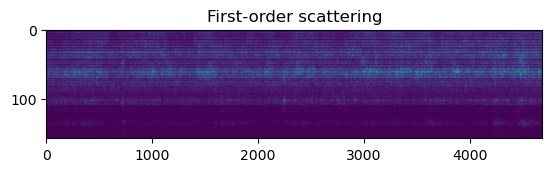

In [23]:
plt.subplot(3, 1, 2)
plt.imshow(Sx[7][order2], aspect='auto')
plt.title('First-order scattering')